## Name of the Project : Creditcard_Customer_Segmentation

### Business Problem :
The Banks would like to segment their creditcard holders based on the usage of creditcard so that they can analyse the results and improve their business.

### Description of the dataset:

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
<b>File Format :</b>csv
    
<b>Rows :</b>8950
    
<b>Columns :</b>18



### Attribute Information :

<b>CUST_ID</b> : Identification of Credit Card holder (Categorical)
    
<b>BALANCE</b> : Balance amount left in their account to make purchases 
    
<b>BALANCE_FREQUENCY</b> : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
    
<b>PURCHASES</b> : Amount of purchases made from account
    
<b>ONEOFF_PURCHASES</b> : Maximum purchase amount done in one-go 
    
<b>INSTALLMENTS_PURCHASES</b> : Amount of purchase done in installment 
    
<b>CASH_ADVANCE</b> : Cash in advance given by the user 
    
<b>PURCHASES_FREQUENCY</b> : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
    
<b>ONEOFFPURCHASESFREQUENCY</b> : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 
    
<b>PURCHASESINSTALLMENTSFREQUENCY</b> : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 
    
<b>CASHADVANCEFREQUENCY</b> : How frequently the cash in advance being paid 
    
<b>CASHADVANCETRX</b> : Number of Transactions made with "Cash in Advanced" 
    
<b>PURCHASES_TRX</b> : Numbe of purchase transactions made 
    
<b>CREDIT_LIMIT</b> : Limit of Credit Card for user 
    
<b>PAYMENTS</b> : Amount of Payment done by user 
    
<b>MINIMUM_PAYMENTS</b> : Minimum amount of payments made by user 
    

<b>PRCFULLPAYMENT</b> : Percent of full payment paid by user 
    
<b>TENURE</b> : Tenure of credit card service for user

### Objective :
To segment the the creditcard holders based on their usage of creditcards.

### Importing necessary libraries :

In [3]:
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

### Reading the data from csv

In [4]:
data=pd.read_csv('D:\Projects\Credit Card customer segmentation/Creditcard.csv')

#### Shape of the data :

In [5]:
data.shape

(8950, 18)

In [6]:
#### First 5 records of dataframe

data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Data types of the dataframe :

In [7]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Note: Since CUST_ID is not give much information,we can drop it.

In [8]:
data.drop('CUST_ID',axis=1,inplace=True)

In [9]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Checking for NaN values :

In [10]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### Observation :

Only 2 columns have NaN values and rest all do not have.

#### Handling NaN values :

In [11]:
data['CREDIT_LIMIT']=data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median())
data['MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())

In [12]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Observation :
Now,all the columns do not have NaN values.

### Correlation matrix of the features :

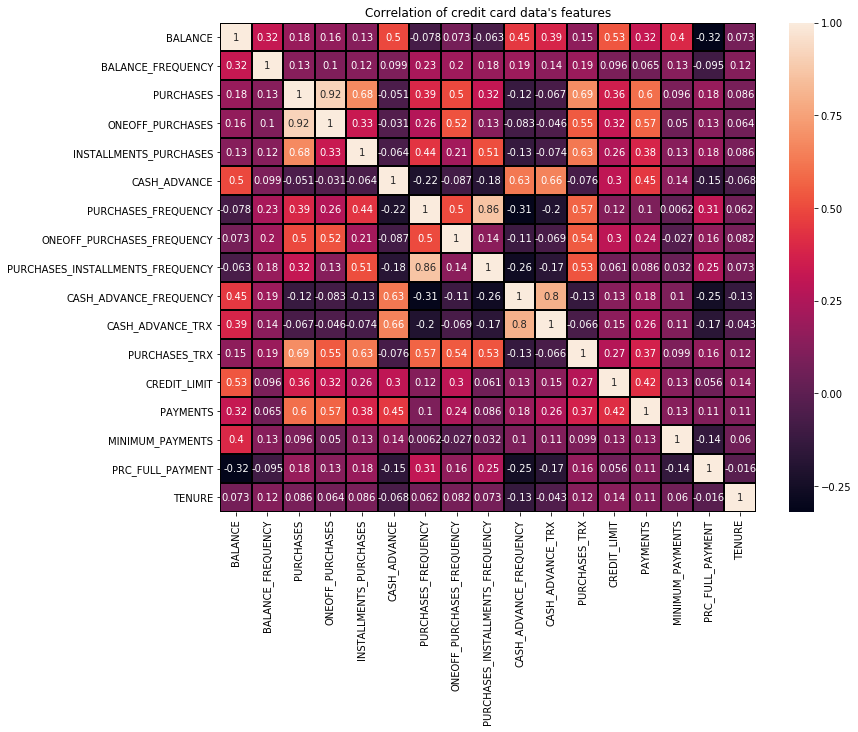

In [15]:
data_correlate = data.corr()
plt.figure(figsize = (12, 9))
sns.heatmap(data_correlate, linecolor = 'black', linewidth = 1, annot = True)
plt.title('Correlation of credit card data\'s features')
plt.show()

#### Observation :

1.PURCHASES,PURCHASES_TRX,PAYMENTS AND INSTALLMENTS_PURCHASES are moderately correlated.

2.PURCHASES,PURCHASES_TRX AND ONEOFF_PURCHASES are highly correlated.

3.PURCHASES_FREQUENCY AND PURCHASES_INSTALLMENTS_FREQUENCY are highly correlated.

4.CASH_ADVANCE_FREQUENCY AND CASH_ADVANCE_TRX are higly correlated.

### Exploratory Data Analysis(EDA):

In [27]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

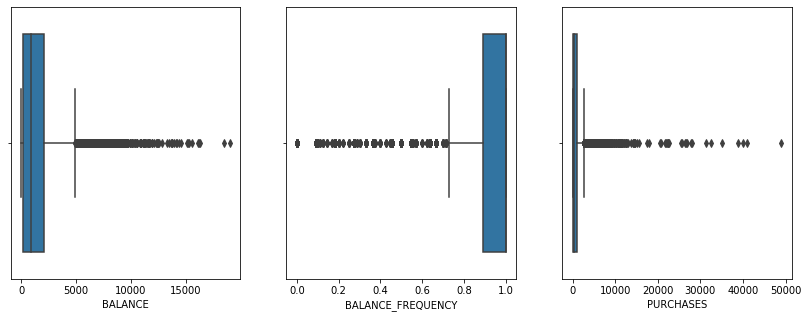

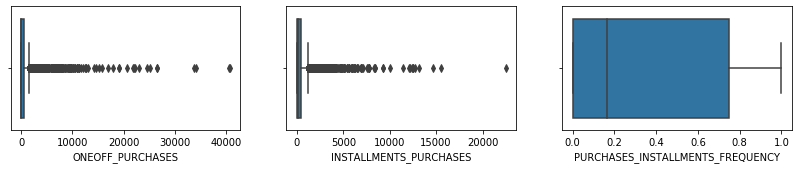

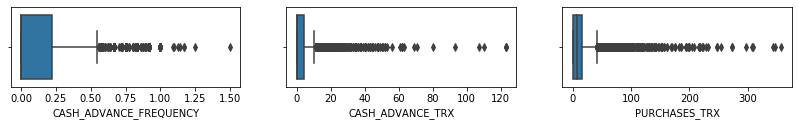

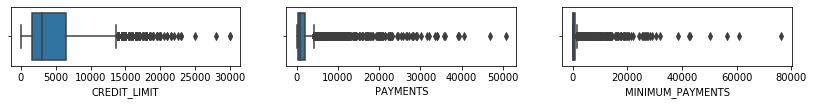

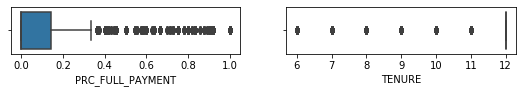

In [34]:
plt.figure(figsize=(14,5))
plt.subplot(131)
sns.boxplot(x='BALANCE',data=data)
plt.subplot(132)
sns.boxplot(x='BALANCE_FREQUENCY',data=data)
plt.subplot(133)
sns.boxplot(x='PURCHASES',data=data)
plt.show()

plt.figure(figsize=(14,5))
plt.subplot(231)
sns.boxplot(x='ONEOFF_PURCHASES',data=data)
plt.subplot(232)
sns.boxplot(x='INSTALLMENTS_PURCHASES',data=data)
plt.subplot(233)
sns.boxplot(x='PURCHASES_INSTALLMENTS_FREQUENCY',data=data)


plt.show()



plt.figure(figsize=(14,5))
plt.subplot(331)
sns.boxplot(x='CASH_ADVANCE_FREQUENCY',data=data)
plt.subplot(332)
sns.boxplot(x='CASH_ADVANCE_TRX',data=data)
plt.subplot(333)
sns.boxplot(x='PURCHASES_TRX',data=data)


plt.show()


plt.figure(figsize=(14,5))
plt.subplot(431)
sns.boxplot(x='CREDIT_LIMIT',data=data)
plt.subplot(432)
sns.boxplot(x='PAYMENTS',data=data)
plt.subplot(433)
sns.boxplot(x='MINIMUM_PAYMENTS',data=data)


plt.show()

plt.figure(figsize=(14,5))
plt.subplot(531)
sns.boxplot(x='PRC_FULL_PAYMENT',data=data)
plt.subplot(532)
sns.boxplot(x='TENURE',data=data)

plt.show()

#### Observation : 
From the boxplots,we can see that many columns have outliers

### Outlier Handling :

We can use Z-score to filter the outliers and then we can handle.

In [56]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

[[0.73198937 0.24943448 0.42489974 ... 0.3024     0.52555097 0.36067954]
 [0.78696085 0.13432467 0.46955188 ... 0.09749953 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10766823 ... 0.0932934  0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.40196519 ... 0.32687479 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.46955188 ... 0.33830497 0.32919999 4.12276757]
 [0.57257511 0.88903307 0.04214581 ... 0.3243581  0.52555097 4.12276757]]


In [57]:
data_outlier_free = pd.DataFrame(data[(z < 3).all(axis=1)], columns = data.columns)

In [58]:
print(data_outlier_free.shape)
data_outlier_free.head()

(7434, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Buliding the model using K-Means clustering :

### Standardizing the data :

Note: K-means is distance based algorithm.Therefore,we need to standardize the data.

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_outlier_free)
data_standardized = pd.DataFrame(data_standardized, columns = data.columns)
data_standardized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.564185,-0.531523,0.312187
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.637483,0.232637,0.312187
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.064164,-0.531523,0.312187
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,-0.341541,-0.531523,0.312187
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.428562,-0.531523,0.312187


### Finding the best number of clusters using elbow method :

In [63]:
from sklearn.cluster import KMeans
k=list(range(2,11))
wcss=[]# wcss=within cluster sum of squred error
for i in k:
    km=KMeans(n_clusters=i,n_jobs=-1)
    km.fit(data_standardized)
    wcss.append(km.inertia_)
    

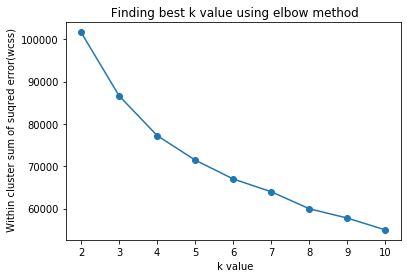

In [64]:
# wcss vs k plot

plt.xlabel(" k value")
plt.ylabel(" Within cluster sum of suqred error(wcss)")
plt.title(" Finding best k value using elbow method")
plt.plot(k,wcss,marker='o')

#### Observation :

From the above plot,we can see that the best number of clusers is 5.

## Building K-Means with best number of clusters :


In [69]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5,random_state=3,n_jobs=-1,init='k-means++')
km.fit(data_standardized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

#### Finding the clusters labels :

In [71]:
clusters=km.labels_
print(clusters)

[1 3 1 ... 1 4 1]


In [72]:
len(clusters)

7434

#### Finding unique clusters :

In [74]:
np.unique(clusters)

array([0, 1, 2, 3, 4])

#### Finding Centroids :

In [75]:
Centroids=km.cluster_centers_

In [76]:
print(Centroids)

[[-0.76458255 -2.13848377 -0.42003481 -0.2879748  -0.39959327 -0.32817621
  -0.54607126 -0.38540776 -0.45717448 -0.48432368 -0.41959416 -0.51662231
  -0.16435254 -0.28236331 -0.55159439  0.38190267 -0.13384393]
 [ 0.01368248  0.39837923 -0.47205255 -0.25927709 -0.5501612  -0.19428642
  -0.70792716 -0.19996527 -0.72709376 -0.01921603 -0.12803511 -0.55781844
  -0.32011425 -0.33743346 -0.00782153 -0.45989616  0.03909546]
 [ 0.17094879  0.37310886  1.94241964  1.8881398   0.9748143  -0.28233313
   1.05174884  1.71585219  0.63321237 -0.34052588 -0.30284362  1.66234775
   0.82084013  0.9578771   0.02212627  0.36618486  0.18222751]
 [ 1.30584134  0.33532368 -0.41918328 -0.29328734 -0.38999004  1.74305641
  -0.61261244 -0.30845532 -0.52229401  1.6851129   1.73355531 -0.45100781
   0.53428456  0.59308834  0.77886124 -0.43299399 -0.11019181]
 [-0.44531458  0.29523142  0.06747557 -0.32023163  0.63963806 -0.44581787
   1.01071701 -0.24277284  1.14978548 -0.51612521 -0.46251655  0.39340393
  -0.242

## Visualizing the clusters :

The labels obtained by the kmeans algorithm is saved in clusters. Now, saving the output into a separate dataframe.

In [77]:
data_out_1 = pd.concat([data_outlier_free, pd.DataFrame({'clusters_kmeans5': clusters})], axis = 1)

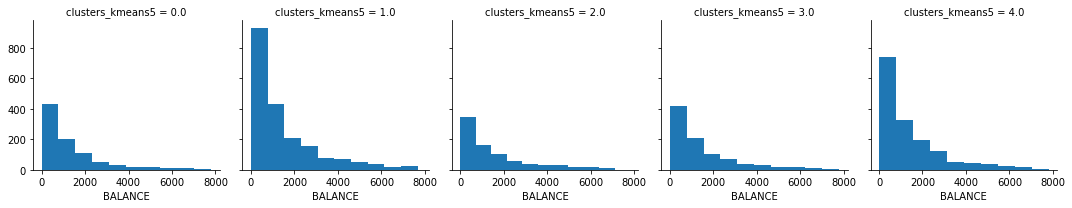

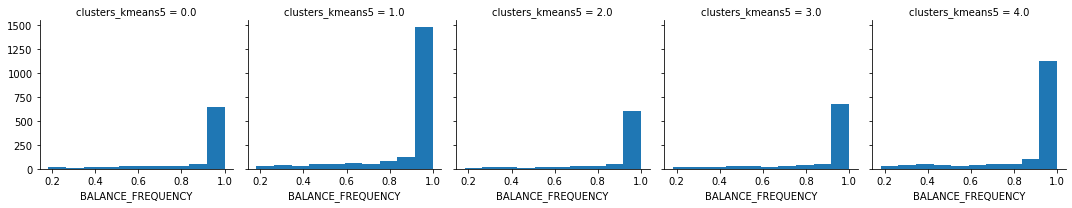

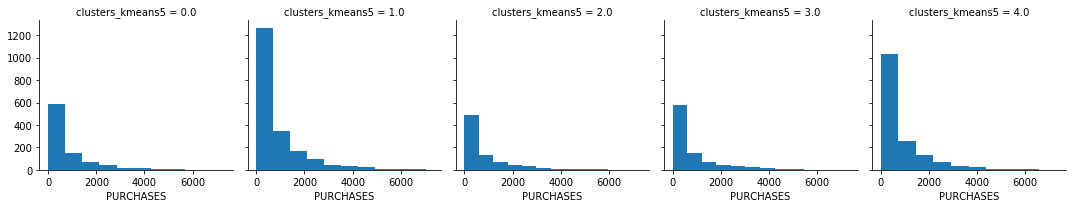

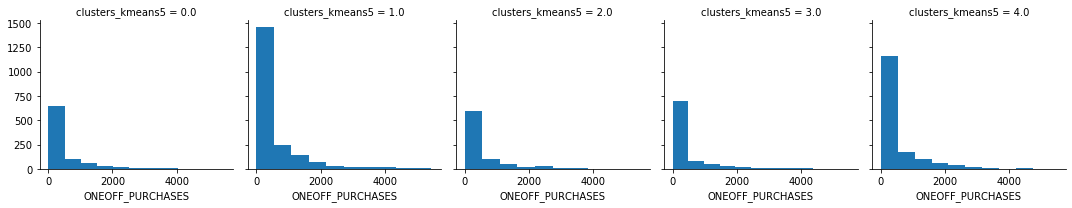

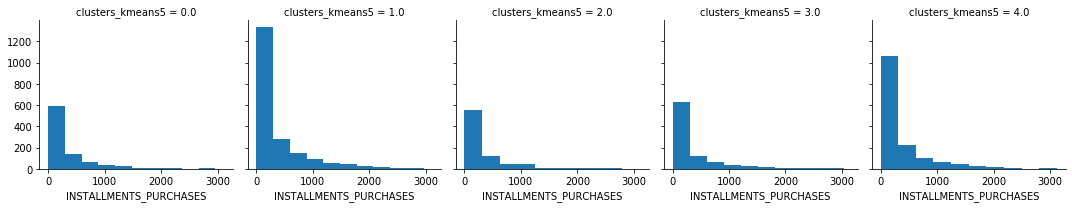

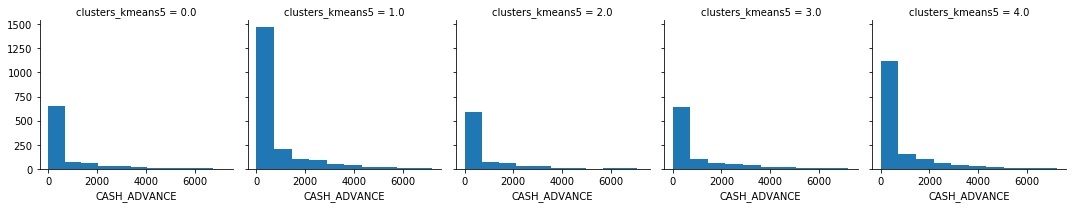

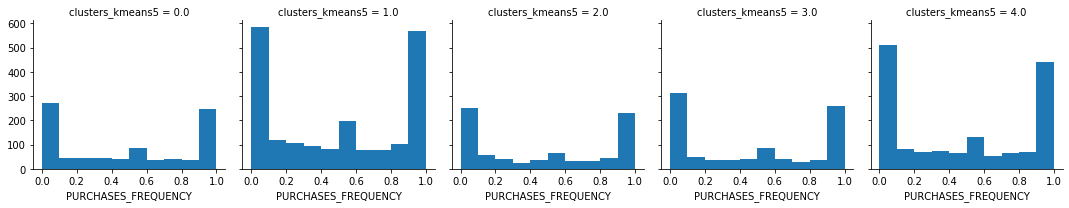

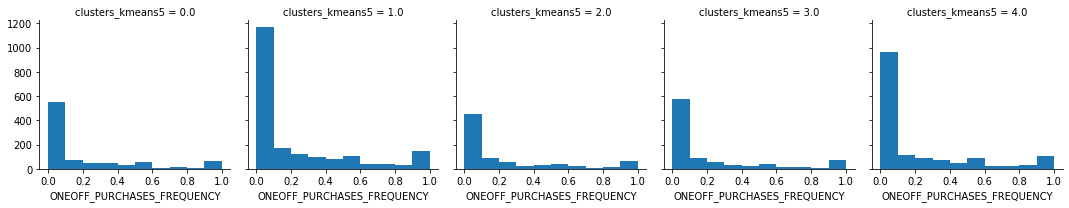

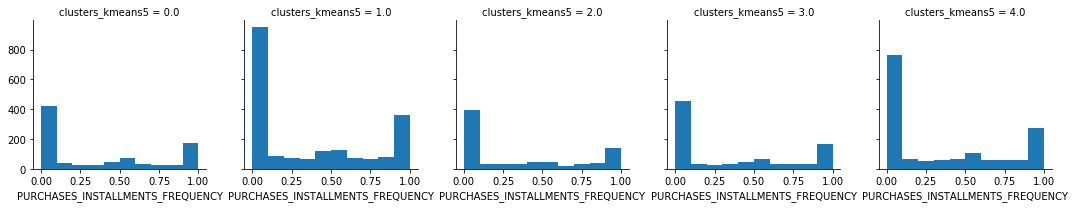

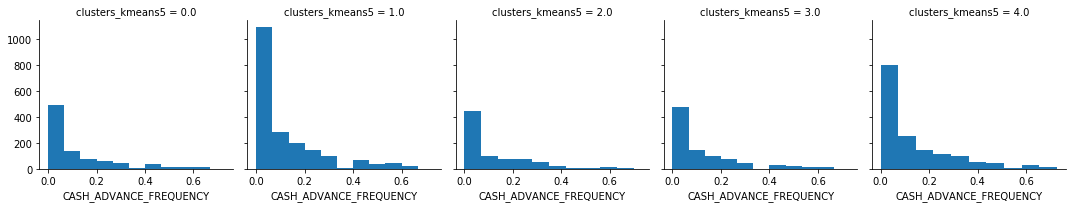

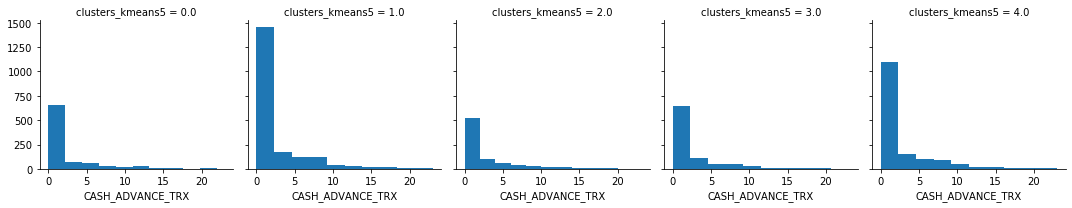

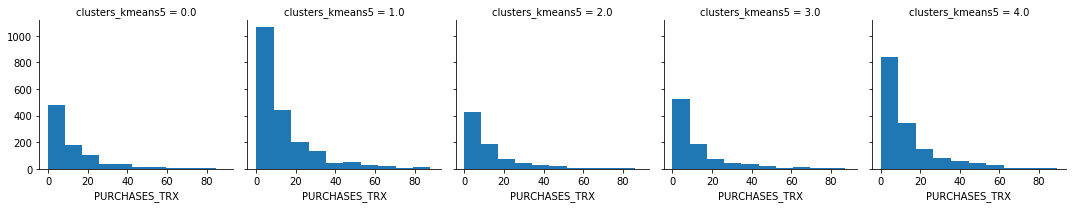

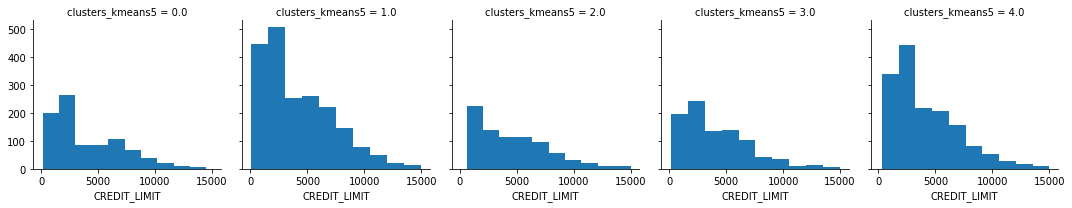

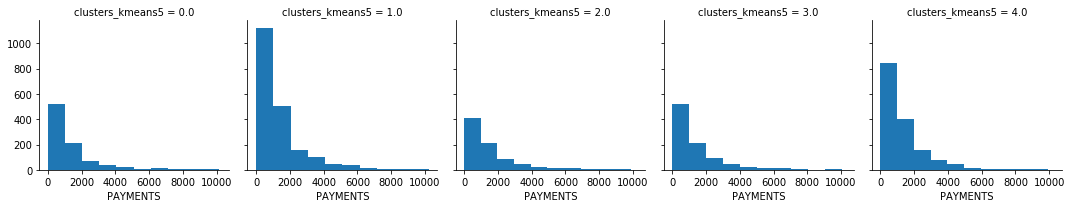

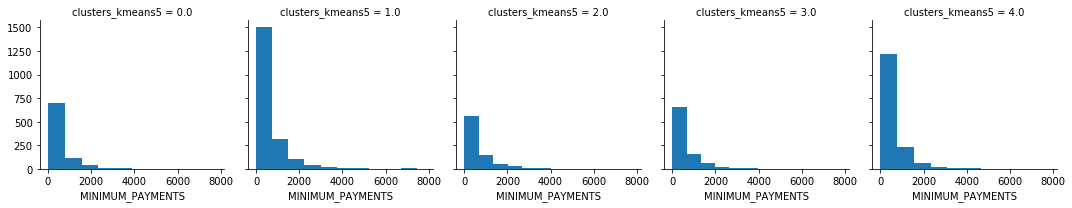

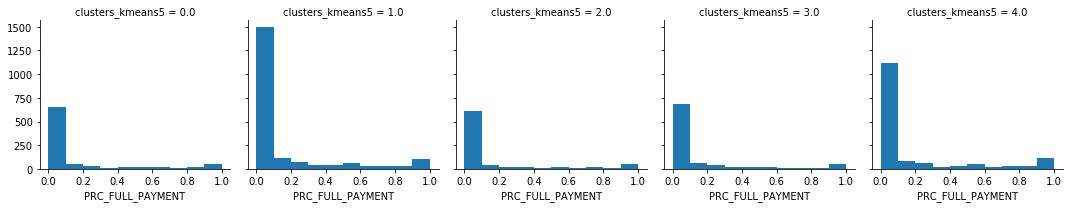

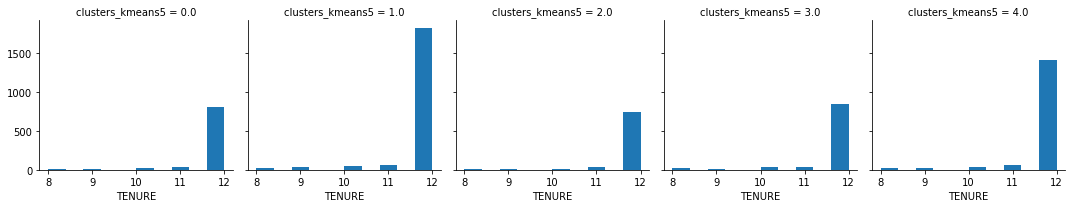

In [78]:
for cols in data_outlier_free:
    g = sns.FacetGrid(data_out_1, col = 'clusters_kmeans5')
    g.map(plt.hist, cols)

## Visualizing using PCA :

In [79]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
affinities = 1 - cosine_similarity(data_standardized)

pca = PCA(2)
pca.fit(affinities)
see_PCA = pca.transform(affinities)

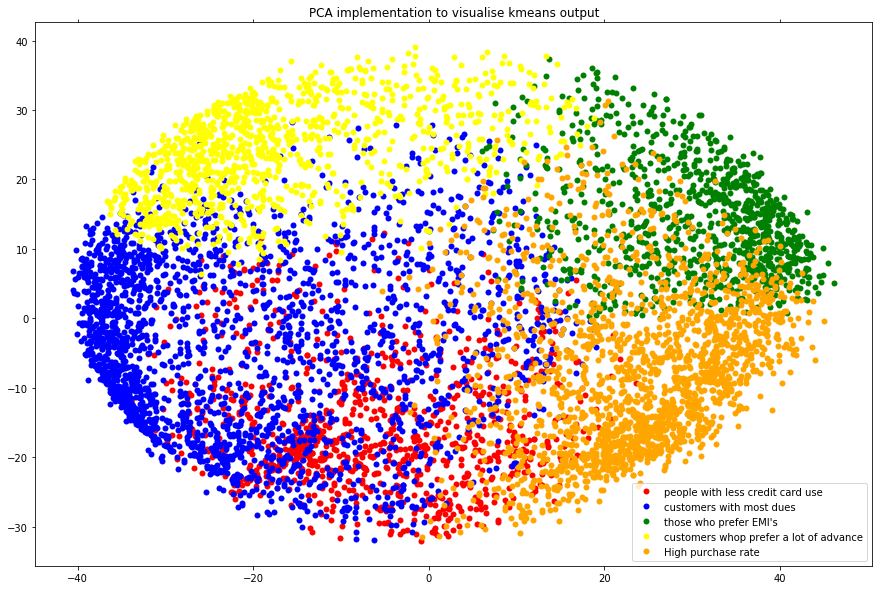

In [82]:
x, y = see_PCA[:, 0], see_PCA[:, 1]

colors = {0: 'red', 
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange'  
          }

names = {0: 'people with less credit card use', 
         1: 'customers with most dues', 
         2: 'those who prefer EMI\'s', 
         3: 'customers whop prefer a lot of advance', 
         4: 'High purchase rate',
        }
  
df = pd.DataFrame({'x': x, 'y':y, 'labels':clusters}) 
groups = df.groupby('labels')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("PCA implementation to visualise kmeans output")
plt.show()